### Q1 answer a) 

Sample Mean: 0.1321816032213041
Sample Standard Deviation: 1.4309633105043642


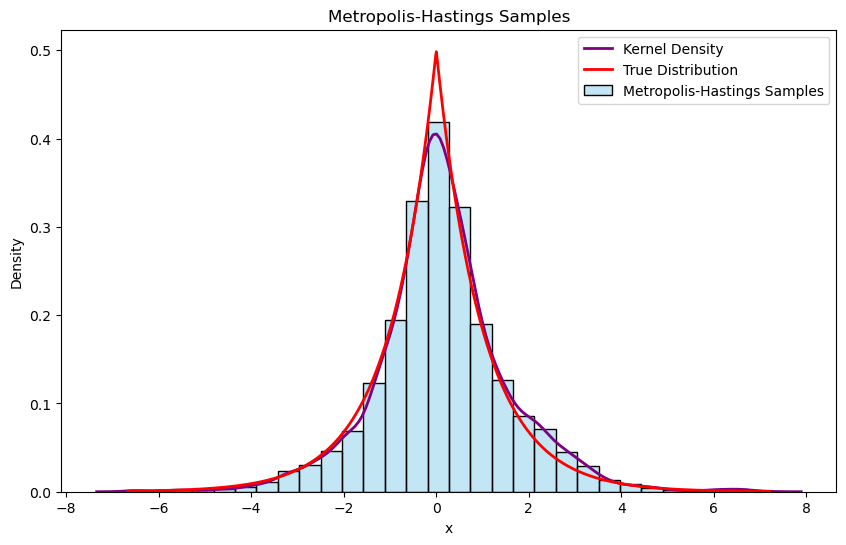

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the probability density function
def f(x):
    return 1/2 * np.exp(-np.abs(x))

# Metropolis-Hastings algorithm
def metropolis(N, initial_x, s):
    x = np.zeros(N)
    x[0] = initial_x
    
    for i in range(1, N):
        # Propose a new sample from the Normal distribution
        randomXStar = np.random.normal(loc=x[i - 1], scale=s)
        
        # Compute the acceptance ratio
        ratio = f(randomXStar) / f(x[i - 1])
        
        # Generate a random number from the uniform distribution
        u = np.log(np.random.uniform())
        
        # Update the sample based on the log acceptance ratio
        if u < np.log(ratio):
            x[i] = randomXStar
        else:
            x[i] = x[i - 1]
    
    return x

np.random.seed(123)

# Parameters
N = 10000  # Number of iterations
initial_x = 0  # Initial value
s = 1  # Standard deviation for the proposal distribution

# Run the Metropolis-Hastings algorithm
generated_samples = metropolis(N, initial_x, s)

# Plot histogram and kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(generated_samples, bins=30, stat='density', kde=True, color='skyblue', label='Metropolis-Hastings Samples')
sns.kdeplot(generated_samples, color='purple', lw=2, label='Kernel Density')
x_values = np.linspace(min(generated_samples), max(generated_samples), 1000)
plt.plot(x_values, f(x_values), color='red', lw=2, label='True Distribution')
plt.legend(loc='upper right')
plt.title('Metropolis-Hastings Samples')
plt.xlabel('x')
plt.ylabel('Density')

# Report sample mean and standard deviation
mean_generated = np.mean(generated_samples)
std_generated = np.std(generated_samples)

print("Sample Mean:", mean_generated)
print("Sample Standard Deviation:", std_generated)

plt.show()


### Q1 answer b)

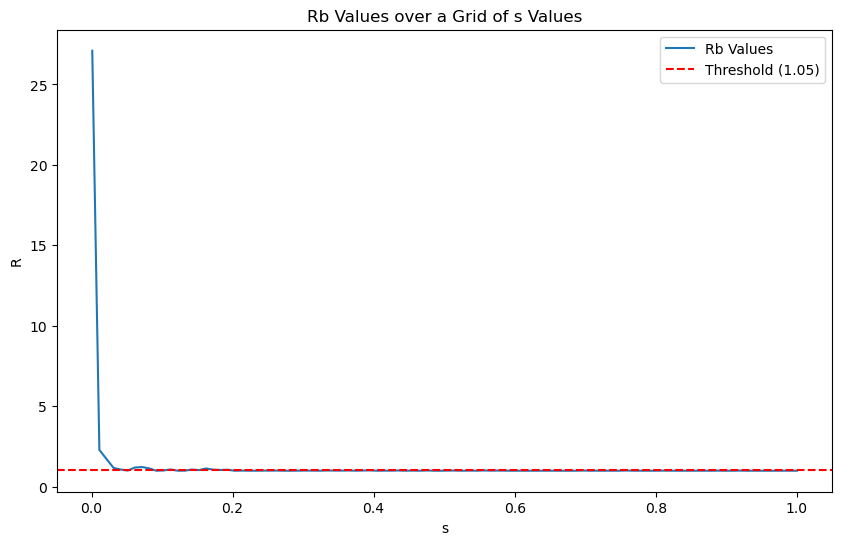

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Function to run Metropolis-Hastings algorithm for a single chain
def metropolis_chain(N, initial_x, s):
    x = np.zeros(N)
    x[0] = initial_x
    
    for i in range(1, N):
        randomXStar = np.random.normal(loc=x[i - 1], scale=s)
        ratio = f(randomXStar) / f(x[i - 1])
        u = np.random.uniform()
        
        if u < ratio:
            x[i] = randomXStar
        else:
            x[i] = x[i - 1]
    
    return x

# Function to calculate Rb value
def calculate_Rb(chains):
    J = len(chains)
    N = len(chains[0])
    
    Mj = 1/N* np.sum(chains)
    Vj = np.var((chains-Mj)**2)
    
    W = 1/J* np.sum(Vj)
    M = 1/J * np.sum(Mj)
    B = 1/J * np.sum((Mj - M)**2)
    
    var_hat = B+W
    Rb = np.sqrt(var_hat / W)
    
    return Rb

# Set random seed for reproducibility
np.random.seed(123)

# Parameters
N = 2000  # Number of iterations
J = 4  # Number of chains
s_values = np.linspace(0.001, 1, 100)  # Grid of s values

# Run Metropolis-Hastings for different s values and calculate Rb
Rb_values = []

for s in s_values:
    chains = [metropolis_chain(N, initial_x=0, s=s) for _ in range(J)]
    Rb_values.append(calculate_Rb(chains))

# Plot Rb values over the grid of s values
plt.figure(figsize=(10, 6))
plt.plot(s_values, Rb_values, label='Rb Values')
plt.axhline(y=1.05, color='red', linestyle='--', label='Threshold (1.05)')
plt.title('Rb Values over a Grid of s Values')
plt.xlabel('s')
plt.ylabel('R')
plt.legend()
plt.show()

## Q2

         DepTime
0           1709
1           1704
2           1705
3           1709
4           1703
...          ...
36269428    1910
36269429    1909
36269430    1907
36269431    1907
36269432    1905

[36269433 rows x 1 columns]
5391485
5200765
4487369
4855375
4225677
4373622
3883089
2676284
681596
206813
20049
Best time of the day to fly is early morning from 0600 to 0800
